In [97]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')


# Import data
df = pd.read_csv('edmunds_extraction.csv')

# Display first 5 rows
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kritikanayyar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kritikanayyar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


dindak  October 2001  \
0     peteri1  October 2001   
1  mrdetailer  October 2001   
2      dindak  October 2001   
3  canadiancl  October 2001   
4     qbrozen  October 2001   

   Buy a 2001/ 2002 Oldsmobile Intrigue. It's one of the best sedans on the market with great handling and one of the best V6 engines around, a 3.5L DOHC producing 215HP. The deals should be great this year as it's the last on for Intrigue and the warrany on them has been extended to 5 years. The car is recommended by most magazines (including Consumer Reports), but is unfortunately over looked by most consumers. It is the sleeper of all sleepers on the market in my opinion.   
0   Am looking at 1 of 4 choices to replace my 99...                                                                                                                                                                                                                                                                                                                                                                                                                                              
1   Generally a 3-4 year old car range is a good ...                                                                                                                                                                                                                                                                                                                                                                                                                                              
2   Maxima and Intrigue are both excellent choice...                                                                                                                                                                                                                                                                                                                                                                                                                                              
3   If I had that kind of budget, I would go for ...                                                                                                                                                                                                                                                                                                                                                                                                                                              
4   Actually, I was about to agree with the A6, b...

In [98]:
# Add headings to columns
df.columns = ['member_name', 'date', 'review']

# Display first 5 rows
df.head()

member_name          date                                             review
0     peteri1  October 2001   Am looking at 1 of 4 choices to replace my 99...
1  mrdetailer  October 2001   Generally a 3-4 year old car range is a good ...
2      dindak  October 2001   Maxima and Intrigue are both excellent choice...
3  canadiancl  October 2001   If I had that kind of budget, I would go for ...
4     qbrozen  October 2001   Actually, I was about to agree with the A6, b...

In [99]:
import nltk
from nltk import word_tokenize
from nltk.tokenize import word_tokenize # For tokenization
from nltk.tokenize import sent_tokenize # For sentence tokenization
from nltk.corpus import stopwords # For stopwords removal

### Tokenization

In [100]:
# Preprocessing function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

# Apply preprocessing to the 'review' column
df['Preprocessed_Review'] = df['review'].apply(preprocess_text)

# Display the result
print(df[['member_name', 'Preprocessed_Review']])

        member_name                                Preprocessed_Review
0           peteri1  [looking, choices, replace, read, everything, ...
1        mrdetailer  [generally, year, old, car, range, good, one, ...
2            dindak  [maxima, intrigue, excellent, choices, midsize...
3        canadiancl  [kind, budget, would, go, best, combination, s...
4           qbrozen  [actually, agree, looked, specs, edmunds, lbs,...
...             ...                                                ...
4994  claywaterfill  [specifically, mentioned, high, reliablility, ...
4995        jpelder  [agree, resale, point, think, alero, lose, muc...
4996         splatt  [well, throw, couple, points, chrysler, annous...
4997        jpelder  [figure, minimum, price, one, agree, awesome, ...
4998     jsylvester  [dealers, getting, cash, subsidize, leases, su...

[4999 rows x 2 columns]


### Stemming and Lemmatizing

In [101]:
from nltk.corpus import wordnet # To access wordnet dictionary
from nltk import pos_tag # For parts of speech tagging
from nltk.stem import WordNetLemmatizer # For lemmatization
from nltk.stem.snowball import SnowballStemmer # For stemming
from nltk.stem import PorterStemmer # For stemming
from sklearn.feature_extraction.text import TfidfVectorizer # For TF-IDF
import string

**Lemmatization** is the process of reducing words to their base or root form, but it involves understanding the context and meaning of words. \
**Part of Speech Tagging (POS-Tag)** is the labeling of the words in a text according to their word types (noun, adjective, adverb, verb, etc.). 
-  Function **get_wordnet_pos** is designed to map part-of-speech (POS) tags obtained from the pos_tag function to WordNet POS tags \
'J': Adjective (e.g., good, bad), 'V': Verb (e.g., think, make), 'N': Noun (e.g., nothing, thinking), 'R': Adverb (e.g., so)
- Function **lemmatize_review** is a function for lemmatization

In [102]:
def get_wordnet_pos(tag):
    if tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('R'):
        return wordnet.ADV
    else:         
        return wordnet.NOUN
    
def lemmatize_review(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    lemmatized_sentence = ' '.join(lemmatized_words)
    return lemmatized_sentence

# Lemmatize the 'preprocessed_review' column
df['Lemmatized'] = df['Preprocessed_Review'].apply(lambda words: lemmatize_review(' '.join(words)))

# Display the result
df[['Preprocessed_Review', 'Lemmatized']].head()

Preprocessed_Review  \
0  [looking, choices, replace, read, everything, ...   
1  [generally, year, old, car, range, good, one, ...   
2  [maxima, intrigue, excellent, choices, midsize...   
3  [kind, budget, would, go, best, combination, s...   
4  [actually, agree, looked, specs, edmunds, lbs,...   

                                          Lemmatized  
0  look choice replace read everything forum see ...  
1  generally year old car range good one basicall...  
2    maximum intrigue excellent choice midsize sedan  
3  kind budget would go best combination sport lu...  
4  actually agree look specs edmunds lbs consider...

### Count the most frequently occuring words

In [103]:
# Import models_df
models_df = pd.read_csv('models.csv')

# Add headings to columns
models_df.columns = ['brand', 'model']

# Display the result
print(models_df.head())

   brand   model
0  acura  Legend
1  acura   vigor
2  acura     rlx
3  acura     ILX
4  acura     MDX


In [104]:
# Find the unique values in the 'brand' and 'model' columns combined
print(len(models_df['brand'] + ' ' + models_df['model']))

539


In [105]:
# Lowercase all the values in models_df
models_df['brand'] = models_df['brand'].str.lower()
models_df['model'] = models_df['model'].str.lower()

# Find the unique values in the 'brand' and 'model' columns combined
unique_brands_models = models_df['brand'] + ' ' + models_df['model']

# Number of unique values
print(len(unique_brands_models.unique()))

509


Hence, we find there were 527 - 498 = 29 repeat combinations (upppercase, lowercase, propercase).

In [106]:
from nltk import FreqDist

# Combine all lemmatized reviews into a single list of words
all_lemmatized_words = [word for review in df['Lemmatized'] for word in review.split()]

# Display the first 10 words
all_lemmatized_words[:10]

['look',
 'choice',
 'replace',
 'read',
 'everything',
 'forum',
 'see',
 'much',
 'conflict',
 'option']

In [107]:
# Create a frequency distribution of words
word_freq = FreqDist(all_lemmatized_words)

# Display the length of word_freq
print(len(word_freq))

# Display the most common words
print("Top 20 most common words:")
word_freq.most_common(20)

1673
Top 20 most common words:


[('car', 6855),
 ('would', 3025),
 ('good', 2776),
 ('get', 2552),
 ('new', 2455),
 ('look', 2388),
 ('like', 2030),
 ('drive', 1907),
 ('think', 1892),
 ('well', 1797),
 ('one', 1607),
 ('buy', 1589),
 ('accord', 1561),
 ('sedan', 1310),
 ('year', 1289),
 ('also', 1278),
 ('camry', 1177),
 ('use', 1067),
 ('old', 1065),
 ('value', 1016)]

In [108]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Combine all lemmatized reviews into a single list of words
all_lemmatized_words = [word for review in df['Lemmatized'] for word in review.split()]

# Use pos_tag to get POS tags for each word
pos_tags = pos_tag(all_lemmatized_words)

# Create a frequency distribution of words with their POS tags
word_freq = FreqDist(pos_tags)

# How many unique adjectives are there?
print('There are {} unique adjectives.'.format(len([word for word in word_freq if word[1] == 'JJ'])))

# How many unique verbs are there?
print('There are {} unique verbs.'.format(len([word for word in word_freq if word[1] == 'VB'])))

# How many unique nouns are there?
print('There are {} unique nouns.'.format(len([word for word in word_freq if word[1] == 'NN'])))

# How many unique adverbs are there?
print('There are {} unique adverbs.'.format(len([word for word in word_freq if word[1] == 'RB'])))

# How many unique prepositions are there?
print('There are {} unique prepositions.'.format(len([word for word in word_freq if word[1] == 'IN'])))

There are 532 unique adjectives.
There are 153 unique verbs.
There are 951 unique nouns.
There are 183 unique adverbs.
There are 50 unique prepositions.


The below lines of codes are written to identify model and brand combinations not currently present in models.csv file

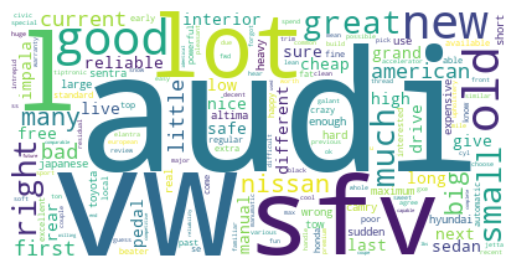

In [109]:
# Create a word cloud for adjectives
from wordcloud import WordCloud

# Create a word cloud for adjectives
# Create a word cloud instance with a specified TrueType font
wc = WordCloud(background_color="white", max_words=1000)

# Generate the word cloud
wc.generate(' '.join([word[0] for word in word_freq if word[1] == 'JJ']))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

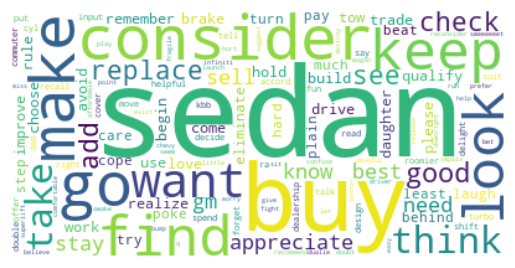

In [110]:
# Create a word cloud for verbs
wc = WordCloud(background_color="white", max_words=1000)

# Generate the word cloud
wc.generate(' '.join([word[0] for word in word_freq if word[1] == 'VB']))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

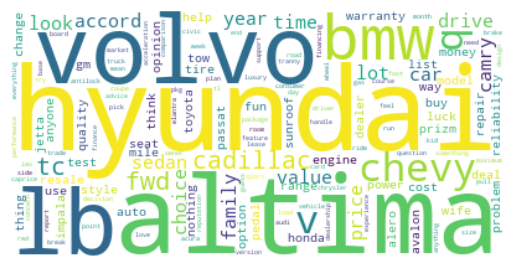

In [111]:
# Create a word cloud for nouns
wc = WordCloud(background_color="white", max_words=1000)

# Generate the word cloud
wc.generate(' '.join([word[0] for word in word_freq if word[1] == 'NN']))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

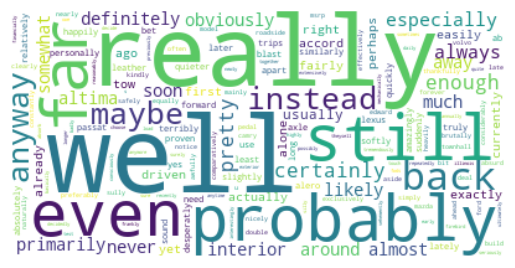

In [112]:
# Create a word cloud for adverbs
wc = WordCloud(background_color="white", max_words=1000)

# Generate the word cloud
wc.generate(' '.join([word[0] for word in word_freq if word[1] == 'RB']))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

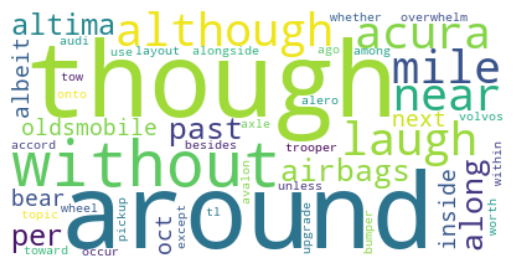

In [113]:
# Create a word cloud for prepositions
wc = WordCloud(background_color="white", max_words=1000)

# Generate the word cloud
wc.generate(' '.join([word[0] for word in word_freq if word[1] == 'IN']))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [114]:
# Convert the word_freq dictionary into a dataframe
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index')

# Reset the index
word_freq_df.reset_index(inplace=True)

# Exprt the dataframe to a csv file
word_freq_df.to_csv('word_freq.csv', index=False)

### Unique models

In [115]:
# Extract values from the 'model' column in models_df
models_list = models_df['model'].values
print(models_list[:10])

# Display the mentioned models
mentioned_models = [model for model in models_list if model.lower() in word_freq]
print("\nModels mentioned in the reviews:")
print(mentioned_models)

# Unique models
unique_models = set(mentioned_models)

# Display the unique models
print("\nUnique models mentioned in the reviews:")
print(unique_models)

['legend' 'vigor' 'rlx' 'ilx' 'mdx' 'rdx' 'tsx' 'rsx' 'quattro' 'a4']

Models mentioned in the reviews:
[]

Unique models mentioned in the reviews:
set()


In [116]:
# Function to identify models mentioned in a lemmatized review
def get_mentioned_models(lemmatized_review, models_list):
    mentioned_models = [model for model in models_list if model.lower() in lemmatized_review]
    return mentioned_models

# Apply the function to every row in the DataFrame
df['Mentioned_Models'] = df['Lemmatized'].apply(lambda review: get_mentioned_models(review, models_df['model'].values.flatten()))

# Display the result
print(df[['member_name', 'Mentioned_Models']])

        member_name                                   Mentioned_Models
0           peteri1                                            [lexus]
1        mrdetailer                                        [amaze, tl]
2            dindak                                         [intrigue]
3        canadiancl                                                 []
4           qbrozen                                              [ist]
...             ...                                                ...
4994  claywaterfill                    [malibu, malibu, accord, alero]
4995        jpelder  [century, cavalier, malibu, malibu, accord, ce...
4996         splatt                              [accord, comfort, tl]
4997        jpelder                                                 []
4998     jsylvester                                    [intrepid, ist]

[4999 rows x 2 columns]


In [117]:
# Display results where the 'Mentioned_Models' column is not empty
df[df['Mentioned_Models'].map(lambda d: len(d)) > 0][['member_name', 'Mentioned_Models']]

member_name                                   Mentioned_Models
0           peteri1                                            [lexus]
1        mrdetailer                                        [amaze, tl]
2            dindak                                         [intrigue]
4           qbrozen                                              [ist]
5       black_tulip                                         [intrigue]
...             ...                                                ...
4993        jpelder  [century, regal, impala, malibu, impala, malib...
4994  claywaterfill                    [malibu, malibu, accord, alero]
4995        jpelder  [century, cavalier, malibu, malibu, accord, ce...
4996         splatt                              [accord, comfort, tl]
4998     jsylvester                                    [intrepid, ist]

[4156 rows x 2 columns]

In [118]:
# Only keep the unique models in each row
df['Mentioned_Models'] = df['Mentioned_Models'].apply(lambda models: list(set(models)))

# Dispay results where the 'Mentioned_Models' column is not empty
df[df['Mentioned_Models'].map(lambda d: len(d)) > 0][['member_name', 'Mentioned_Models']]

member_name                                   Mentioned_Models
0           peteri1                                            [lexus]
1        mrdetailer                                        [amaze, tl]
2            dindak                                         [intrigue]
4           qbrozen                                              [ist]
5       black_tulip                                         [intrigue]
...             ...                                                ...
4993        jpelder  [cruiser, regal, tl, accord, malibu, alero, ch...
4994  claywaterfill                            [malibu, alero, accord]
4995        jpelder  [malibu, alero, ist, bb, cavalier, century, ac...
4996         splatt                              [tl, comfort, accord]
4998     jsylvester                                    [intrepid, ist]

[4156 rows x 2 columns]

In [119]:
# Find the number of times each model is mentioned
mentioned_model_freq = FreqDist([model for models in df['Mentioned_Models'] for model in models])

# Display the result for the top 10 models
print("Top 10 mentioned models:")
mentioned_model_freq.most_common(10)

Top 10 mentioned models:


[('accord', 1045),
 ('tl', 1014),
 ('camry', 724),
 ('altima', 674),
 ('ist', 588),
 ('passat', 374),
 ('prizm', 332),
 ('impala', 332),
 ('sentra', 297),
 ('chevy', 291)]

In [120]:
# Create a mapping dictionary from models to brands
model_to_brand_dict = dict(zip(models_df['model'], models_df['brand']))

# Function to replace models with brands in Mentioned_Models
def replace_models_with_brands(mentioned_models, model_to_brand_dict):
    return [model_to_brand_dict.get(model, model) for model in mentioned_models]

# Apply the function to create the 'Mentioned_Brands' column
df['Mentioned_Brands'] = df['Mentioned_Models'].apply(lambda models: replace_models_with_brands(models, model_to_brand_dict))

# Display the result
print(df[['member_name', 'Mentioned_Models', 'Mentioned_Brands']])

        member_name                                   Mentioned_Models  \
0           peteri1                                            [lexus]   
1        mrdetailer                                        [amaze, tl]   
2            dindak                                         [intrigue]   
3        canadiancl                                                 []   
4           qbrozen                                              [ist]   
...             ...                                                ...   
4994  claywaterfill                            [malibu, alero, accord]   
4995        jpelder  [malibu, alero, ist, bb, cavalier, century, ac...   
4996         splatt                              [tl, comfort, accord]   
4997        jpelder                                                 []   
4998     jsylvester                                    [intrepid, ist]   

                                       Mentioned_Brands  
0                                               [lexu

In [121]:
# Display results where the 'Mentioned_Brands' column is not empty
df[df['Mentioned_Brands'].map(lambda d: len(d)) > 0][['member_name', 'Mentioned_Brands']]

member_name                                   Mentioned_Brands
0           peteri1                                            [lexus]
1        mrdetailer                                     [honda, honda]
2            dindak                                       [oldsmobile]
4           qbrozen                                           [toyota]
5       black_tulip                                       [oldsmobile]
...             ...                                                ...
4993        jpelder  [chrysler, buick, honda, honda, chevrolet, old...
4994  claywaterfill                     [chevrolet, oldsmobile, honda]
4995        jpelder  [chevrolet, oldsmobile, toyota, toyota, chevro...
4996         splatt                             [honda, toyota, honda]
4998     jsylvester                                    [dodge, toyota]

[4156 rows x 2 columns]

In [122]:
# Find the number of times each brand is mentioned
mentioned_brand_freq = FreqDist([brand for brands in df['Mentioned_Brands'] for brand in brands])

# Display the result for the top 10 brands
print("Top 10 mentioned brands:")
mentioned_brand_freq.most_common(10)

Top 10 mentioned brands:


[('honda', 2530),
 ('toyota', 2094),
 ('chevrolet', 1473),
 ('nissan', 1264),
 ('volkswagen', 783),
 ('hyundai', 700),
 ('chrysler', 450),
 ('volkwagen', 374),
 ('oldsmobile', 348),
 ('subaru', 339)]

In [123]:
# Function to get mentioned brands with one space in between
def get_mentioned_brands_with_space(mentioned_brands):
    return ' '.join(mentioned_brands)

# Apply the function to create the 'Mentioned_Brands_Sent' column
df['Mentioned_Brands_Sent'] = df['Mentioned_Brands'].apply(get_mentioned_brands_with_space)

# Display the result
print(df[['member_name', 'Mentioned_Brands_Sent']])

        member_name                              Mentioned_Brands_Sent
0           peteri1                                              lexus
1        mrdetailer                                        honda honda
2            dindak                                         oldsmobile
3        canadiancl                                                   
4           qbrozen                                             toyota
...             ...                                                ...
4994  claywaterfill                         chevrolet oldsmobile honda
4995        jpelder  chevrolet oldsmobile toyota toyota chevrolet t...
4996         splatt                                 honda toyota honda
4997        jpelder                                                   
4998     jsylvester                                       dodge toyota

[4999 rows x 2 columns]


In [124]:
# Count the number of times each brand is mentioned in 'Mentioned_Brands_Sent' column
brand_freq = FreqDist([brand for brands in df['Mentioned_Brands_Sent'] for brand in brands.split()])

# Display the result for the top 10 brands
print("Top 10 mentioned brands:")
brand_freq.most_common(10)

Top 10 mentioned brands:


[('honda', 2530),
 ('toyota', 2094),
 ('chevrolet', 1473),
 ('nissan', 1264),
 ('volkswagen', 783),
 ('hyundai', 700),
 ('chrysler', 450),
 ('volkwagen', 374),
 ('oldsmobile', 348),
 ('subaru', 339)]

In [125]:
# Standardize brand names in 'Mentioned_Brands_Sent' column
df['Mentioned_Brands_Sent'] = df['Mentioned_Brands_Sent'].str.replace('volkwagen', 'volkswagen')

# Recount the frequency of each brand
brand_freq = FreqDist([brand for brands in df['Mentioned_Brands_Sent'] for brand in brands.split()])

# Get the top 10 mentioned brands
top_brands = brand_freq.most_common(10)

# Create a DataFrame from the list of tuples
top_brands = pd.DataFrame(top_brands, columns=['Brand', 'Frequency'])

# Display the DataFrame
print(top_brands)

        Brand  Frequency
0       honda       2530
1      toyota       2094
2   chevrolet       1473
3      nissan       1264
4  volkswagen       1157
5     hyundai        700
6    chrysler        450
7  oldsmobile        348
8      subaru        339
9       dodge        328


In [126]:
# Only keep rows where the 'Lemmatized_Mentioned_Brands' column is not empty
df = df[df['Mentioned_Brands_Sent'].map(lambda d: len(d)) > 0]

# Display the result
print(df[['member_name', 'Mentioned_Brands_Sent']])

        member_name                              Mentioned_Brands_Sent
0           peteri1                                              lexus
1        mrdetailer                                        honda honda
2            dindak                                         oldsmobile
4           qbrozen                                             toyota
5       black_tulip                                         oldsmobile
...             ...                                                ...
4993        jpelder  chrysler buick honda honda chevrolet oldsmobil...
4994  claywaterfill                         chevrolet oldsmobile honda
4995        jpelder  chevrolet oldsmobile toyota toyota chevrolet t...
4996         splatt                                 honda toyota honda
4998     jsylvester                                       dodge toyota

[4156 rows x 2 columns]


### Lift ratios

In [127]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import MDS
import re
import spacy
import spacy.cli
from spacy.lang.en import stop_words

# Convert documents into a list
all_reviews = df['Mentioned_Brands_Sent'].tolist()

# Initialize the CountVectorizer to transform the text data into a bag-of-words model only for the top 10 most frequent non-stopwords, do the MDS for those words
vectorizer = CountVectorizer(stop_words=list(stop_words.STOP_WORDS), # stopwords in NLTK is more complete than Sklearn, https://gist.github.com/sebleier/554280
                             max_features=10, # include only the top 10 words
                             token_pattern='[a-zA-Z0-9]{3,}') # include words with more than 3 characters 

# Transform the documents into a document-term matrix
dtm = vectorizer.fit_transform(all_reviews)

# Extract feature names (non-stopwords)
feature_names = vectorizer.get_feature_names_out()

# Convert the document-term matrix to a dense array
dtm_array = dtm.toarray()

# Calculate lift between terms
term_lift = np.dot(dtm_array.T, dtm_array)
term_occurrence = np.sum(dtm_array, axis=0)
# + 1e-8 is added to avoid division by zero
lift_matrix = term_lift / (np.outer(term_occurrence, term_occurrence) + 1e-8)

# Calculate dissimilarity matrix based on lift
dissimilarity_matrix = 1 / lift_matrix
print(dissimilarity_matrix)

[[  740.2691914   7204.89130435  6039.3         9045.36407767
   1874.72727273  4552.25427873  1824.21352313            inf
   5931.65769231 14442.88983051]
 [ 7204.89130435   368.18181818  4472.72727273  5060.
   3150.          5925.          1223.4375      1525.5
   2963.20754717  1979.65779468]
 [ 6039.3         4472.72727273   328.         17656.17021277
             inf 12563.39393939  1729.45454545            inf
   3672.89839572  1442.95057034]
 [ 9045.36407767  5060.         17656.17021277  1683.56128353
   5903.33333333  2985.91970121  8077.43119266  2858.9
   3599.0625      3008.43782117]
 [ 1874.72727273  3150.                    inf  5903.33333333
    350.          2528.          1218.                    inf
   5863.2         2699.66666667]
 [ 4552.25427873  5925.         12563.39393939  2985.91970121
   2528.           968.30060606  1981.40540541  8569.92
   3393.35384615  2281.51014041]
 [ 1824.21352313  1223.4375      1729.45454545  8077.43119266
   1218.          1981.4

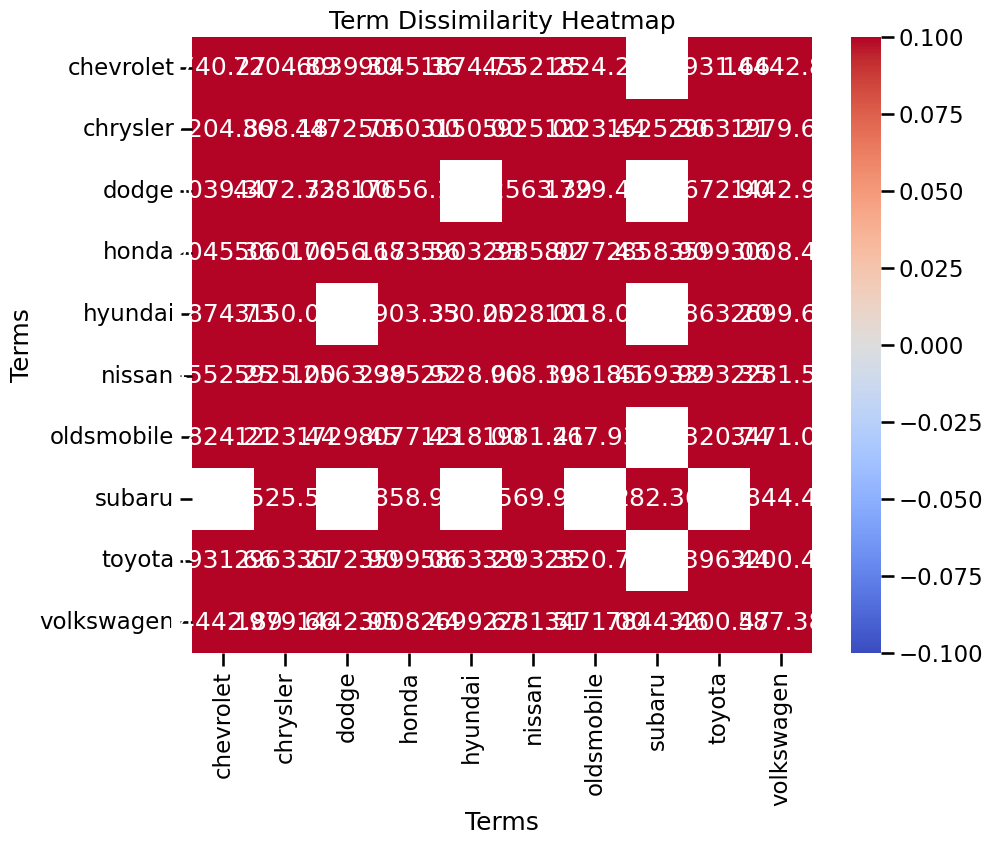

In [128]:
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(dissimilarity_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            xticklabels=feature_names, yticklabels=feature_names)

# Set titles and labels
plt.title('Term Dissimilarity Heatmap')
plt.xlabel('Terms')
plt.ylabel('Terms')

# Show the plot
plt.show()

### MDS

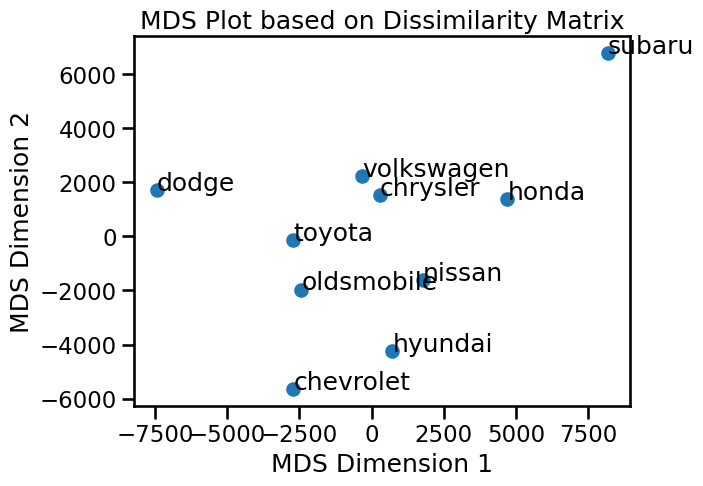

In [129]:
# Replace infinity values with a large finite value
finite_value = np.max(dissimilarity_matrix[np.isfinite(dissimilarity_matrix)])
dissimilarity_matrix[np.isinf(dissimilarity_matrix)] = finite_value

# Apply MDS to reduce dimensionality to 2D
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_result = mds.fit_transform(dissimilarity_matrix)

# Plot the MDS result
plt.scatter(mds_result[:, 0], mds_result[:, 1])

# Annotate points with feature names
for i, txt in enumerate(feature_names):
    plt.annotate(txt, (mds_result[i, 0], mds_result[i, 1]))

plt.title('MDS Plot based on Dissimilarity Matrix')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()

### Most Frequent Attributes 

In [130]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer to transform the text data into a bag-of-words model
vectorizer = CountVectorizer(
    stop_words='english',  # Remove English stop words
    max_features=None,     # Consider all words
    token_pattern='[a-zA-Z0-9]{3,}'  # Include words with more than 3 characters
)

# Assuming 'Stemmed' or 'Lemmatized' column contains the processed text
# Concatenate all reviews into a single string for the vectorizer
all_text = df['Lemmatized'].str.cat(sep=' ')

# Transform the text into a document-term matrix
dtm = vectorizer.fit_transform([all_text])  # Pass as a list to treat all text as one document

# Extract feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the document-term matrix to a dense array and sum to get word counts
word_counts = np.sum(dtm.toarray(), axis=0)

# Create a DataFrame with the words and their corresponding counts
word_count_df = pd.DataFrame({'Word': feature_names, 'Count': word_counts})

# Sort the words by their counts in descending order
word_count_df.sort_values(by='Count', ascending=False, inplace=True)

# Display the words and their counts
word_count_df.head(200)

Word  Count
200       car   6197
539      good   2643
818       new   2242
714      look   2114
694      like   1907
...       ...    ...
479   finance    176
1033  replace    175
679   leather    173
907     point    173
199   caprice    172

[200 rows x 2 columns]

In [131]:
# Take the 'Word' column from the top 200 rows and convert it to a list
top_200_words_list = word_count_df.head(200)['Word'].tolist()

# Now you have a list of the top 200 words
print(top_200_words_list)

['car', 'good', 'new', 'look', 'like', 'drive', 'think', 'accord', 'buy', 'sedan', 'camry', 'year', 'old', 'value', 'time', 'want', 'altima', 'use', 'say', 'consider', 'tow', 'know', 'lot', 'come', 'price', 'family', 'warranty', 'really', 'need', 'honda', 'toyota', 'best', 'choice', 'passat', 'probably', 'nissan', 'reliability', 'interior', 'impala', 'mile', 'make', 'engine', 'prizm', 'resale', 'small', 'great', 'fun', 'option', 'model', 'quality', 'style', 'dealer', 'maximum', 'jetta', 'love', 'sure', 'list', 'acura', 'little', 'hyundai', 'edmunds', 'alero', 'avalon', 'range', 'bad', 'big', 'luck', 'civic', 'money', 'handle', 'sunroof', 'american', 'current', 'power', 'seat', 'try', 'help', 'cost', 'opinion', 'different', 'grand', 'volvo', 'sell', 'hold', 'nice', 'change', 'coupe', 'reliable', 'tire', 'long', 'elantra', 'test', 'max', 'pick', 'thing', 'end', 'manual', 'thanks', 'add', 'feature', 'right', 'wife', 'lexus', 'pkg', 'people', 'design', 'repair', 'choose', 'rear', 'live', '

In [132]:
# Based on the first 200 words by frequency, the most frequently mentioned attributes are:
#freq_attrib = ['look','drive','value','tow','price','family',
               #'warranty','brake','reliability','make','interior','pedal',
               #'style','small','mile','engine','resale','big','quality',
               #'maximum','power','seat','range','cost','handle','sunroof',
               #'money','manual','two','rear','reliable',
               #'tire','cheap','design','repair','sport','rwd',
               #'wheel','build','performance','room','standard','safe','luxury', 'acceleration']

Next, we manually categorize these to 6 attributes.

In [133]:
# Initialize the car attributes dictionary
car_attributes_dict = {
    'performance': ['power', 'acceleration', 'speed', 'engine', 'mile', 'range', 'performance'],
    'safety': ['brake', 'safe', 'pedal', 'tire', 'airbag', 'wheel','standard'],
    'cost': ['price', 'value', 'money', 'cheap', 'resale', 'cost'],
    'reliability': ['warranty', 'repair', 'quality', 'reliability','reliable'],
    'technology': ['manual','sunroof','rwd','drive','seat', 'handle', 'rear'],
    'style': ['luxury','family','build', 'look', 'interior', 'make', 'style', 'small','big','two','design','sport', 'room']
}


# Print the updated car_attributes_dict
for attribute, words in car_attributes_dict.items():
    print(f"{attribute}: {words}")

performance: ['power', 'acceleration', 'speed', 'engine', 'mile', 'range', 'performance']
safety: ['brake', 'safe', 'pedal', 'tire', 'airbag', 'wheel', 'standard']
cost: ['price', 'value', 'money', 'cheap', 'resale', 'cost']
reliability: ['warranty', 'repair', 'quality', 'reliability', 'reliable']
technology: ['manual', 'sunroof', 'rwd', 'drive', 'seat', 'handle', 'rear']
style: ['luxury', 'family', 'build', 'look', 'interior', 'make', 'style', 'small', 'big', 'two', 'design', 'sport', 'room']


In [134]:
attribute_counts = {attr: 0 for attr in car_attributes_dict}
for index, row in df.iterrows():
    for attribute, keywords in car_attributes_dict.items():
        if any(word in row['Lemmatized'] for word in keywords):
            attribute_counts[attribute] += 1
print(attribute_counts)

{'performance': 1570, 'safety': 1028, 'cost': 1707, 'reliability': 1632, 'technology': 2074, 'style': 2963}


Top 5 Attributes

In [135]:
# Sort the dictionary by value and get the top 5
top_5_attributes = dict(sorted(attribute_counts.items(), key=lambda item: item[1], reverse=True)[:5])

# Convert the top 5 attributes into a DataFrame
top_5_attributes_df = pd.DataFrame(list(top_5_attributes.items()), columns=['Attribute', 'Frequency'])

# Display the DataFrame
print(top_5_attributes_df)

     Attribute  Frequency
0        style       2963
1   technology       2074
2         cost       1707
3  reliability       1632
4  performance       1570


Top 5 Brands

In [136]:
# Select top 5 brands from the DataFrame
top_5_brands_df = top_brands.head(5)

# Display the top 5 brands DataFrame
print(top_5_brands_df)

        Brand  Frequency
0       honda       2530
1      toyota       2094
2   chevrolet       1473
3      nissan       1264
4  volkswagen       1157


TF-IDF

In [137]:
# Create a corpus
corpus = []
for brand in top_5_brands_df['Brand']:  # Make sure to iterate over the 'Brand' column
    # Concatenate all reviews mentioning the brand
    # Adjust this line according to your DataFrame structure
    text = ' '.join(df[df['Mentioned_Brands_Sent'].str.contains(brand, na=False)]['review'])
    corpus.append(text)

In [138]:
corpus

[' Generally a 3-4 year old car range is a good one because they are basically sound. If possible get one that is still under warrenty. But if not, make sure that a trusted Maxima mechanic goes over it thoroughly. Their V-6 is one of the best rated for over 10 years. Personally I am amazed at the great strides in American Quality recently, so the Olds may not be a bad idea other.   I would recommend the Honda Accord or Toyota Camry as my choices for a sedan. The new Nissan Altima looks impressive but I would wait until the reliability of the 2002 is proven.The new BMW 525 is another nice car and is rated highly by many auto publications.   I looked at S4 and 330xi. i liked s4 interior and exterior better, but ride was harsh as a daily commuter (17" summer tires and wheels) and sport suspension as well. also, as a lease, i was going to have to purchase 4 snow tires (actually 5 - one for the trunk), because i live in new england...but, i really liked driving the s4. if it was for around 

In [139]:
# Extract the attribute names into a list from the DataFrame
top_5_attribute_names = top_5_attributes_df['Attribute'].tolist()

# Flatten the list of words for the top 5 attributes into a single list
flattened_vocabulary = [word for attribute in top_5_attribute_names for word in car_attributes_dict.get(attribute, [])]
flattened_vocabulary

['luxury',
 'family',
 'build',
 'look',
 'interior',
 'make',
 'style',
 'small',
 'big',
 'two',
 'design',
 'sport',
 'room',
 'manual',
 'sunroof',
 'rwd',
 'drive',
 'seat',
 'handle',
 'rear',
 'price',
 'value',
 'money',
 'cheap',
 'resale',
 'cost',
 'warranty',
 'repair',
 'quality',
 'reliability',
 'reliable',
 'power',
 'acceleration',
 'speed',
 'engine',
 'mile',
 'range',
 'performance']

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with the flattened vocabulary
vectorizer = TfidfVectorizer(stop_words='english', vocabulary=flattened_vocabulary)

# Fit and transform the corpus with TF-IDF
tfidf_matrix = vectorizer.fit_transform(corpus)

# Create a DataFrame for the TF-IDF scores
tfidf_scores = pd.DataFrame(tfidf_matrix.toarray(), index=top_5_brands_df['Brand'], columns=vectorizer.get_feature_names_out())

# Display the TF-IDF scores DataFrame
print(tfidf_scores)

              luxury    family     build      look  interior      make  \
Brand                                                                    
honda       0.112419  0.471118  0.000000  0.123283  0.201069  0.071915   
toyota      0.160209  0.179946  0.118957  0.149836  0.203604  0.121876   
chevrolet   0.000000  0.122656  0.000000  0.131826  0.128388  0.030951   
nissan      0.000000  0.142268  0.000000  0.046493  0.400768  0.125531   
volkswagen  0.034170  0.055378  0.224117  0.022962  0.379543  0.055378   

               style     small       big  two  ...   quality  reliability  \
Brand                                          ...                          
honda       0.078520  0.125485  0.109340  0.0  ...  0.119614     0.213544   
toyota      0.122593  0.055203  0.070975  0.0  ...  0.161306     0.177795   
chevrolet   0.114632  0.006878  0.110046  0.0  ...  0.011463     0.253336   
nissan      0.099495  0.098565  0.046493  0.0  ...  0.136689     0.186901   
volkswagen  0.23096

### Aggregated TF-IDF 

In [141]:
# Initialize an empty DataFrame for the aggregated scores
aggregated_tfidf_scores = pd.DataFrame(index=top_5_brands_df['Brand'], columns=top_5_attribute_names)

# Aggregate the scores
for attribute in top_5_attribute_names:
    # Sum the TF-IDF scores of the words associated with each attribute
    aggregated_tfidf_scores[attribute] = tfidf_scores[car_attributes_dict[attribute]].sum(axis=1)

# Display the aggregated TF-IDF scores DataFrame
print(aggregated_tfidf_scores)

               style  technology      cost  reliability  performance
Brand                                                               
honda       1.608842    0.845974  1.028500     0.775827     0.858144
toyota      1.486886    0.743873  1.182462     0.949943     0.676081
chevrolet   0.887414    1.070735  1.041692     0.677473     0.531011
nissan      1.124304    0.708550  1.163312     0.858386     0.375426
volkswagen  1.489306    0.821450  0.516432     0.890258     0.581944


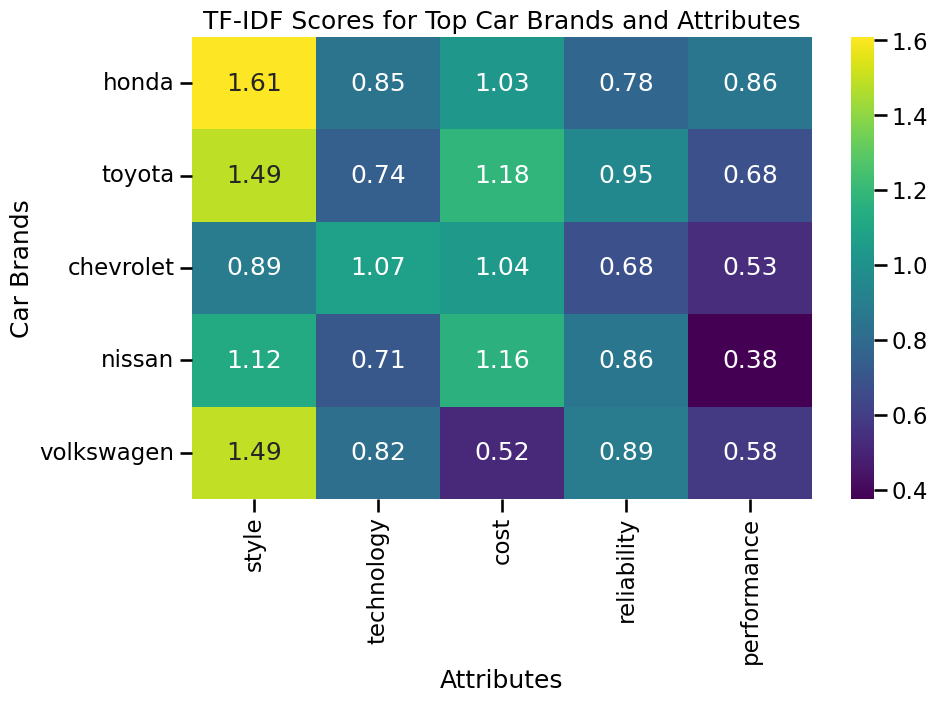

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the context for the heatmap
sns.set_context('talk')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(aggregated_tfidf_scores, annot=True, fmt=".2f", cmap='viridis')

# Add labels and a title
plt.title('TF-IDF Scores for Top Car Brands and Attributes')
plt.xlabel('Attributes')
plt.ylabel('Car Brands')

# Display the heatmap
plt.show()

### Most Aspirational Brands

In [143]:
#list of possible aspirational terms and phrases 
aspir_terms = []
aspir_terms = [('love', 'to'),
('would', 'love'),
('would', 'hope'),
('hope', 'to'),
('wish', 'to'),
('wish', 'that'),
('wish', 'for'),
('wishing', 'for'),
('want', 'to'),
('wants', 'to'),
('dream', 'of'),
('daydreaming', 'about'),
('dream', 'to'),
('desire', 'for'),
('desire', 'to'),
('everyone', 'desires'),
('future', 'car'),
('near', 'future'),
('future', 'vehicle'),
('to', 'buy'),
('buy', 'the'),
('buy', 'it'),
('can', 'buy'),
('would', 'buy'),
('will', 'buy'),
('will', 'buy'),
('could', 'buy'),
('buy', 'cars'),
('buy', 'new'),
('may', 'buy'),
('to', 'purchase'),
('purchase', 'the'),
('purchase', 'it'),
('purchase', 'cars'),
('possible', 'purchase'),
('will', 'purchase'),
('next', 'purchase'),
('like', 'to'),
('will', 'get'),
('could', 'get'),
('I', 'wish'),
('can', 'get')]

In [144]:
df = pd.read_csv(r"edmunds_extraction.csv")
models_data = pd.read_csv(r"models.csv")

# Add headings to columns
df.columns = ['member_name', 'date', 'review']
models_data.columns = ['brand', 'model']

# Standardize brand names
def standardize_brand_name(brand):
    brand_corrections = {'volkwagen': 'volkswagen', 'vw': 'volkswagen'}
    return brand_corrections.get(brand, brand)

# Map models to brands with standardized brand names
models_data['brand'] = models_data['brand'].str.lower().apply(standardize_brand_name)
models_data['model'] = models_data['model'].str.lower()
model_to_brand = dict(zip(models_data['model'], models_data['brand']))

valid_brands = set(models_data['brand'].unique())

# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [145]:
#Creating bigrams
def create_bigrams(tokens):
    return list(set(ngrams(tokens, 2)))

#Coutning Aspirational mentions
def aspir_count(bigram_list):
    # Assumes aspir_terms is already defined
    return any(bigram in aspir_terms for bigram in bigram_list)

# Preprocessing reviews and creating bigrams
df.columns = ['member_name', 'date', 'review']
df['Preprocessed_Review'] = df['review'].apply(preprocess_text)
df['Bigram list'] = df['Preprocessed_Review'].apply(create_bigrams)

# Determining if each review contains aspirational bigrams
df['aspirational'] = df['Bigram list'].apply(aspir_count)

# Map models to brands and count mentions
def map_models_to_brands_and_count(tokens):
    brand_mentions = Counter()
    for token in tokens:
        brand = model_to_brand.get(token, token)
        if brand in valid_brands:
            brand_mentions[brand] += 1
    return brand_mentions


df['Brand_Mentions'] = df['Preprocessed_Review'].apply(map_models_to_brands_and_count)

#Overall brand frequencies
brand_frequencies = Counter()
for mentions in df['Brand_Mentions']:
    brand_frequencies.update(mentions)


### Lift Values for Aspirational Brands 

In [146]:
aspr_matrix = pd.DataFrame(index=brand_frequencies.keys(), columns=['Lift'])

# Calculating lift values for aspirational brands
for brand in brand_frequencies.keys():
    freq_brand = brand_frequencies[brand]
    freq_aspr = sum(df['aspirational'])
    freq_both = 0
    for index, row in df.iterrows():
        if row['aspirational']:
            freq_both += row['Brand_Mentions'].get(brand, 0)
    lift = (freq_both / freq_brand) / (freq_aspr / len(df)) if freq_brand and freq_aspr else 0
    aspr_matrix.loc[brand, 'Lift'] = lift


top_aspr_matrix = aspr_matrix.sort_values(by='Lift', ascending=False).head(5)
print(top_aspr_matrix)

                Lift
genovation  9.361423
nissan      4.240838
seat         2.33452
honda       1.969444
toyota       1.81746
